In [1]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


/Users/firattamur/Desktop/spring22/indr491/QNBFinansBank/env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

# data paths
path_train_baseline = "./data/train_imputed_balanced.csv"


In [3]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9,CAT10,CAT11,CAT12
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000000,0.200195,0.788112,...,2.0,4.0,3.0,2.0,2.0,2.0,7.0,7.0,0.0,0.0
1,1,0.725049,0.180594,0.000000,0.000000,0.165312,0.090790,0.054237,0.255107,0.722679,...,1.0,3.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000000,0.200195,0.788112,...,2.0,2.0,6.0,2.0,15.0,2.0,7.0,15.0,15.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125000,0.322863,0.788112,...,0.0,1.0,3.0,1.0,19.0,2.0,7.0,19.0,19.0,0.0
4,4,0.725049,0.180594,0.000000,0.000000,0.165312,0.000000,0.054237,0.255107,0.722679,...,1.0,4.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0


Training GAUSSIANNB...
 executed in 0.8 seconds.
Training DecisionTree...
 executed in 3.3 seconds.
Training KNeighbors...
 executed in 277.4 seconds.
Training LogisticReg...
 executed in 2.0 seconds.
Training RandomForest...
 executed in 38.1 seconds.
Training XGBoost...
[02:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

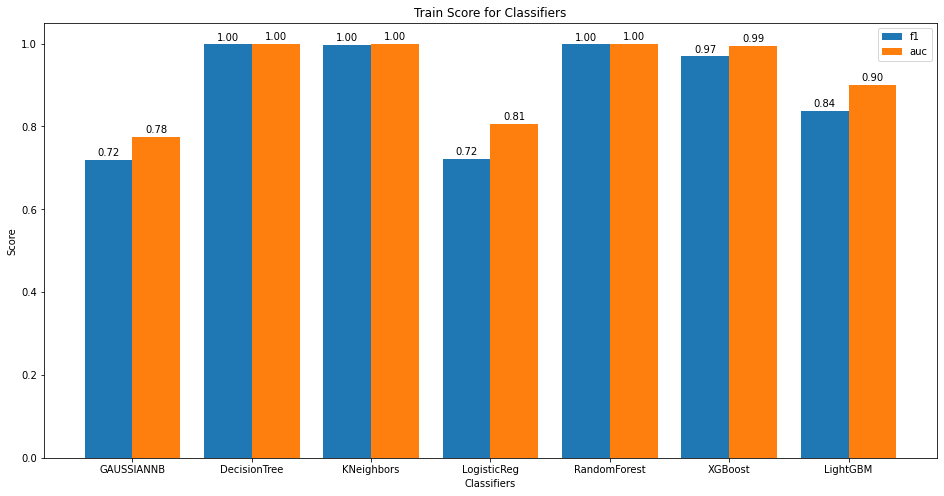

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[3916 1786]
 [1482 4184]]
 ###############################
 executed in 0.0 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[5335  367]
 [  26 5640]]
 ###############################
 executed in 0.0 seconds.
Testing KNeighbors...
 ###### Confusion Matrix #######
[[5324  378]
 [  48 5618]]
 ###############################
 executed in 14.0 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[4434 1268]
 [1747 3919]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[5643   59]
 [  26 5640]]
 ###############################
 executed in 0.4 seconds.
Testing XGBoost...
 ###### Confusion Matrix #######
[[5287  415]
 [ 207 5459]]
 ###############################
 executed in 0.0 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[4526 1176]
 [ 826 4840]]
 ###############################
 executed in 0.1 seconds.


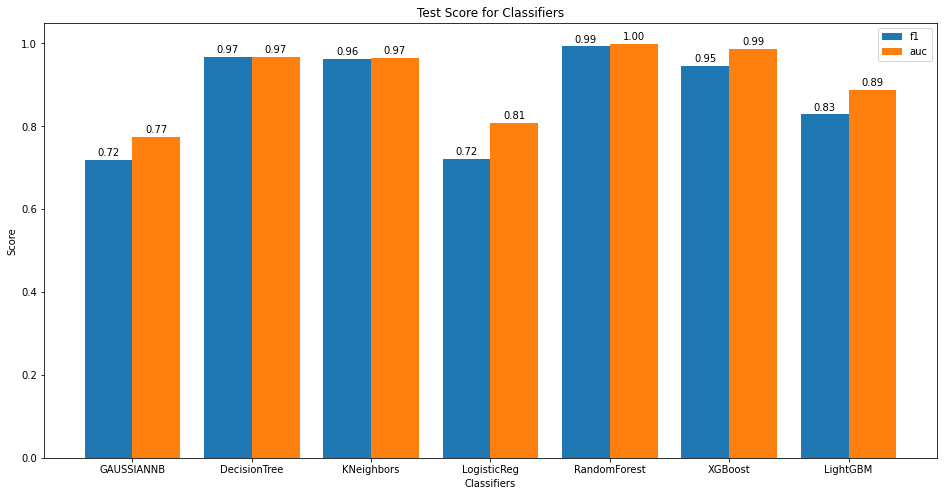

In [4]:

col     = "TARGET"
exclude = ["ID"]

# drop excluded columns and target column for X value
X = df_train.drop(exclude + [col], axis=1).values

# get target values
y = df_train[col].values

classifiers  = Classifiers(X, y, test_size=0.20, classifiers = CustomMLClassifiers.list(set_class_weight=False))

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()

